# **The Atoms of Computation**

In this article we’ll look at the basics principles behind these devices. To help us transition over to quantum computing later on, we’ll do it using the same tools as we'll use for quantum.

In [1]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram

In [2]:
%config InlineBackend.figure_format = 'svg'

## Classical Bits

The binary number system, is based on the number two in order to create an alphabet. This means using the two characters 0 and 1 to express numbers as multiples of powers of two. For example, 9213 becomes 10001111111101, since



$$ 9213  = (1 \times 2^{13}) + (0 \times 2^{12}) + (0 \times 2^{11})+ (0 \times 2^{10}) +(1 \times 2^9) + (1 \times 2^8) + (1 \times 2^7) \\\\ \,\,\,   + (1 \times 2^6) + (1 \times 2^5) + (1 \times 2^4) + (1 \times 2^3) + (1 \times 2^2) + (0 \times 2^1) + (1 \times 2^0) $$


In [3]:
import aux_functions as af

In [4]:
bin_number = af.numbertobin(131)
bin_number

'10000011'

In [5]:
number = af.bintonumber(bin_number)
number

131

## Quantum Circuit

In a circuit we typically need to do three jobs: First encode the input, then do some actual computation, and finally extract an output.

In [6]:
qbits = 8 # Number of QBits
reg = 8 # Number of registers
qc_output = QuantumCircuit(qbits, reg)

The extraction of outputs in a quantum circuit is done using an operation called `measure`. Each measurement tells a specific qubit to give an output to a specific output bit. The following code adds a `measure` operation to each of our eight qubits. The command `qc.measure(j,j)` adds a measurement to our circuit `qc` that tells qubit `j` to write an output to bit `j`.

In [7]:
for j in range(8):
    qc_output.measure(j,j)

In [8]:
qc_output.draw()

┌─┐                     
q_0: |0>┤M├─────────────────────
        └╥┘┌─┐                  
q_1: |0>─╫─┤M├──────────────────
         ║ └╥┘┌─┐               
q_2: |0>─╫──╫─┤M├───────────────
         ║  ║ └╥┘┌─┐            
q_3: |0>─╫──╫──╫─┤M├────────────
         ║  ║  ║ └╥┘┌─┐         
q_4: |0>─╫──╫──╫──╫─┤M├─────────
         ║  ║  ║  ║ └╥┘┌─┐      
q_5: |0>─╫──╫──╫──╫──╫─┤M├──────
         ║  ║  ║  ║  ║ └╥┘┌─┐   
q_6: |0>─╫──╫──╫──╫──╫──╫─┤M├───
         ║  ║  ║  ║  ║  ║ └╥┘┌─┐
q_7: |0>─╫──╫──╫──╫──╫──╫──╫─┤M├
         ║  ║  ║  ║  ║  ║  ║ └╥┘
 c_0: 0 ═╩══╬══╬══╬══╬══╬══╬══╬═
            ║  ║  ║  ║  ║  ║  ║ 
 c_1: 0 ════╩══╬══╬══╬══╬══╬══╬═
               ║  ║  ║  ║  ║  ║ 
 c_2: 0 ═══════╩══╬══╬══╬══╬══╬═
                  ║  ║  ║  ║  ║ 
 c_3: 0 ══════════╩══╬══╬══╬══╬═
                     ║  ║  ║  ║ 
 c_4: 0 ═════════════╩══╬══╬══╬═
                        ║  ║  ║ 
 c_5: 0 ════════════════╩══╬══╬═
                           ║  ║ 
 c_6: 0 ═══════════════════╩══╬═
                              ║ 
 c_7: 0 ══════════════════════╩═

Qubits are always initialized to give the output 0 (ground state). Since we don't do anything to our qubits in the circuit above, this is exactly the result we'll get when we measure them.

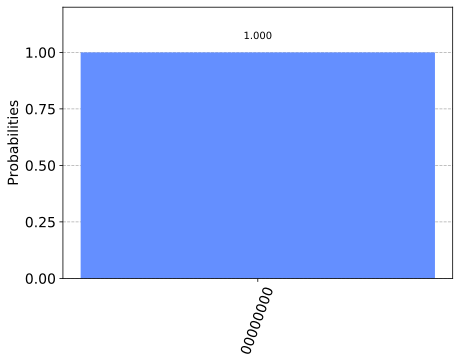

In [9]:
counts = execute(qc_output,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

## Example: An Adder Circuit

Now let's look at how to encode a different binary string as an input. For this we need what is known as a NOT gate. This is the most basic operation that you can do in a computer. It simply flips the bit value: 0 becomes 1 and 1 becomes 0. For qubits, it is an operation called x that does the job of the NOT.

In [10]:
qc_encode = QuantumCircuit(8)
qc_encode.x(7)

qc_encode.draw()

q_0: |0>─────
             
q_1: |0>─────
             
q_2: |0>─────
             
q_3: |0>─────
             
q_4: |0>─────
             
q_5: |0>─────
             
q_6: |0>─────
        ┌───┐
q_7: |0>┤ X ├
        └───┘

Extracting results can be done using the circuit we have from before: `qc_output`. Adding the two circuits using `qc_encode + qc_output` creates a new circuit with everything needed to extract an output added at the end. This can be done because the size of the circuits are the same

In [11]:
qc = qc_encode + qc_output
qc.draw(justify='none')

┌─┐                     
q_0: |0>─────┤M├─────────────────────
             └╥┘┌─┐                  
q_1: |0>──────╫─┤M├──────────────────
              ║ └╥┘┌─┐               
q_2: |0>──────╫──╫─┤M├───────────────
              ║  ║ └╥┘┌─┐            
q_3: |0>──────╫──╫──╫─┤M├────────────
              ║  ║  ║ └╥┘┌─┐         
q_4: |0>──────╫──╫──╫──╫─┤M├─────────
              ║  ║  ║  ║ └╥┘┌─┐      
q_5: |0>──────╫──╫──╫──╫──╫─┤M├──────
              ║  ║  ║  ║  ║ └╥┘┌─┐   
q_6: |0>──────╫──╫──╫──╫──╫──╫─┤M├───
        ┌───┐ ║  ║  ║  ║  ║  ║ └╥┘┌─┐
q_7: |0>┤ X ├─╫──╫──╫──╫──╫──╫──╫─┤M├
        └───┘ ║  ║  ║  ║  ║  ║  ║ └╥┘
 c_0: 0 ══════╩══╬══╬══╬══╬══╬══╬══╬═
                 ║  ║  ║  ║  ║  ║  ║ 
 c_1: 0 ═════════╩══╬══╬══╬══╬══╬══╬═
                    ║  ║  ║  ║  ║  ║ 
 c_2: 0 ════════════╩══╬══╬══╬══╬══╬═
                       ║  ║  ║  ║  ║ 
 c_3: 0 ═══════════════╩══╬══╬══╬══╬═
                          ║  ║  ║  ║ 
 c_4: 0 ══════════════════╩══╬══╬══╬═
                             ║  ║  ║ 
 c_5: 0 ═════════════════════╩══╬══╬═
                                ║  ║ 
 c_6: 0 ════════════════════════╩══╬═
                                   ║ 
 c_7: 0 ═══════════════════════════╩═

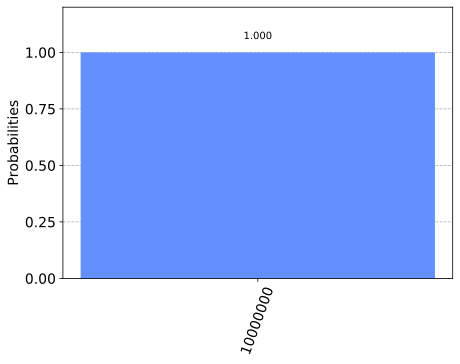

In [12]:
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

Just as we expected because the action of the operator `x`

Now our computer outputs the string ```10000000``` instead.

The bit we flipped, which comes from qubit 7, lives on the far left of the string. This is because Qiskit numbers the bits in a string from right to left. If this convention seems odd to you, don’t worry. It seems odd to lots of other people too, and some prefer to number their bits the other way around. But this system certainly has its advantages when we are using the bits to represent numbers. Specifically, it means that qubit 7 is telling us about how many $2^7$s we have in our number. So by flipping this bit, we’ve now written the number 128 in our simple 8-bit computer.

Let's make our own half adder using Qiskit. This will include a part of the circuit that encodes the input, a part that executes the algorithm, and a part that extracts the result. The first part will need to be changed whenever we want to use a new input, but the rest will always remain the same.

![image3](https://s3.us-south.cloud-object-storage.appdomain.cloud/strapi/04498f84a69d4e859afd19b2760ced24atoms6.png)


To get this part of our solution correct, we need something that can figure out whether two bits are different or not. Traditionally, in the study of digital computation, this is called an XOR gate.

In quantum computers, the job of the XOR gate is done by the controlled-NOT gate. Since that's quite a long name, we usually just call it the CNOT. In Qiskit its name is cx, which is even shorter. In circuit diagrams it is drawn as in the image below.

In [13]:
qc_cnot = QuantumCircuit(2)
qc_cnot.cx(0,1)
qc_cnot.draw()

q_0: |0>──■──
        ┌─┴─┐
q_1: |0>┤ X ├
        └───┘

This is applied to a pair of qubits. One acts as the control qubit (this is the one with the little dot). The other acts as the *target qubit* (with the big circle).

There are multiple ways to explain the effect of the CNOT. One is to say that it looks at its two input bits to see whether they are the same or different. Then it writes over the target qubit with the answer. The target becomes ```0``` if they are the same, and ```1``` if they are different.

In [14]:
qc = QuantumCircuit(2,2)
qc.x(0)
qc.cx(0,1)
qc.measure(0,0)
qc.measure(1,1)
qc.draw()

┌───┐     ┌─┐   
q_0: |0>┤ X ├──■──┤M├───
        └───┘┌─┴─┐└╥┘┌─┐
q_1: |0>─────┤ X ├─╫─┤M├
             └───┘ ║ └╥┘
 c_0: 0 ═══════════╩══╬═
                      ║ 
 c_1: 0 ══════════════╩═

If you execute this circuit, you’ll find that the output is ```11```. We can think of this happening because of either of the following reasons.

- The CNOT calculates whether the input values are different and finds that they are, which means that it wants to output ```1```. It does this by writing over the state of qubit 1 (which, remember, is on the left of the bit string), turning ```01``` into ```11```.

- The CNOT sees that qubit 0 is in state ```1```, and so applies a NOT to qubit 1. This flips the ```0``` of qubit 1 into a ```1```, and so turns ```01``` into ```11```.

For our half adder, we don’t want to overwrite one of our inputs. Instead, we want to write the result on a different pair of qubits. For this we can use two CNOTs.

In [15]:
qc_ha = QuantumCircuit(4,2)
qc_ha.x(0)
qc_ha.x(1)
qc_ha.barrier()

qc_ha.cx(0,2)
qc_ha.cx(1,2)
qc_ha.barrier()

qc_ha.measure(2,0) 
qc_ha.measure(3,1)

qc_ha.draw()

┌───┐ ░            ░       
q_0: |0>┤ X ├─░───■────────░───────
        ├───┤ ░   │        ░       
q_1: |0>┤ X ├─░───┼────■───░───────
        └───┘ ░ ┌─┴─┐┌─┴─┐ ░ ┌─┐   
q_2: |0>──────░─┤ X ├┤ X ├─░─┤M├───
              ░ └───┘└───┘ ░ └╥┘┌─┐
q_3: |0>──────░────────────░──╫─┤M├
              ░            ░  ║ └╥┘
 c_0: 0 ══════════════════════╩══╬═
                                 ║ 
 c_1: 0 ═════════════════════════╩═

We are now halfway to a fully working half adder. We just have the other bit of the output left to do: the one that will live on qubit 4.

If you look again at the four possible sums, you’ll notice that there is only one case for which this is ```1``` instead of ```0```: ```1+1```=```10```. It happens only when both the bits we are adding are ```1```.

To calculate this part of the output, we could just get our computer to look at whether both of the inputs are ```1```. If they are — and only if they are — we need to do a NOT gate on qubit 4. That will flip it to the required value of ```1``` for this case only, giving us the output we need.

For this we need a new gate: like a CNOT, but controlled on two qubits instead of just one. This will perform a NOT on the target qubit only when both controls are in state ```1```. This new gate is called the *Toffoli*. For those of you who are familiar with Boolean logic gates, it is basically an AND gate.

In Qiskit, the Toffoli is represented with the `ccx` command.

In [16]:
qc_ha = QuantumCircuit(4,2)
qc_ha.x(0) 
qc_ha.x(1)
qc_ha.barrier()
# use cnots to write the XOR of the inputs on qubit 2
qc_ha.cx(0,2)
qc_ha.cx(1,2)
# use ccx to write the AND of the inputs on qubit 3
qc_ha.ccx(0,1,3)
qc_ha.barrier()
# extract outputs
qc_ha.measure(2,0) # extract XOR value
qc_ha.measure(3,1) # extract AND value

qc_ha.draw()

┌───┐ ░                 ░       
q_0: |0>┤ X ├─░───■─────────■───░───────
        ├───┤ ░   │         │   ░       
q_1: |0>┤ X ├─░───┼────■────■───░───────
        └───┘ ░ ┌─┴─┐┌─┴─┐  │   ░ ┌─┐   
q_2: |0>──────░─┤ X ├┤ X ├──┼───░─┤M├───
              ░ └───┘└───┘┌─┴─┐ ░ └╥┘┌─┐
q_3: |0>──────░───────────┤ X ├─░──╫─┤M├
              ░           └───┘ ░  ║ └╥┘
 c_0: 0 ═══════════════════════════╩══╬═
                                      ║ 
 c_1: 0 ══════════════════════════════╩═

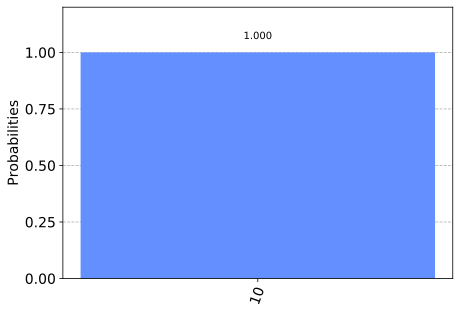

In [17]:
counts = execute(qc_ha,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

The result is ```10```, which is the binary representation of the number 2. We have built a computer that can solve the famous mathematical problem of 1+1!

The half adder contains everything you need for addition. With the NOT, CNOT and Toffoli gates, we can create programs that add any set of numbers of any size.

These three gates are enough to do everything else in computing too. In fact, we can even do without the CNOT, and the NOT gate is only really needed to create bits with value ```1```. The Toffoli gate is essentially the atom of mathematics. It is the simplest element into which every other problem-solving technique can be compiled.